In [31]:
# MODULOS DO PYTHON

from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# FUNCOES

def edos(mod): #funcao para contruir EDO em Latex
    if mod == 1:
        diffeq = Eq(x*f.diff(x)+f,0) #y' = y/x
    elif mod == 2:
        diffeq = Eq(f.diff(x)-cos(x),0) #y' = cos(x)
    elif mod == 3:
        diffeq = Eq(f.diff(x)-2*x,0) #y' = 2x
    elif mod == 4:
        diffeq = Eq(f.diff(x),(x+1)*(np.e**(-x))*f**2)
        
    return diffeq

def EDO_sol(mod,sol,c1,xmin,dx): #funcao para calculo de valores para solucao

    part = sol.subs('C1',c1) #define cte para solucao particular em Latex
    #display(part) #imprime solucao particular 

    y = np.zeros(100) #armazenar valores da solucao particular
    j = 0

    for i in range(100): #intervalo de x para calcular valores numericos
        x_i = xmin + i*dx; 
        res = solve(part.subs(x,x_i)) #resultado da solucao em funcao de x
        if len(res) > 0: #checa se existe solucao
            mydict = res[0] #extrai dicionario da lista
            for key, value in mydict.items() : #extrai valor do dicionario
                y[j] = float(value)
                j+=1
        else:
            y[j] = np.NaN; print(f'SINGULARIDADE EM C:{c1} x:{x_i} NAN')
            j+=1

    return y

def plota(rad,mod,sol,c1,xmin,x_plota): #funcao para plotar solucoes da EDO
    

    y = EDO_sol(mod,sol,c1,xmin,dx) #funcao que calcula solucoes particulares
    plt.plot(x_plota,y,linewidth=1,label="C = "+str(c1))

    return y


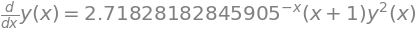

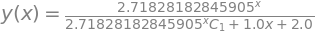

SINGULARIDADE EM C:-2 x:0.0 NAN
SINGULARIDADE EM C:0 x:-2.0 NAN


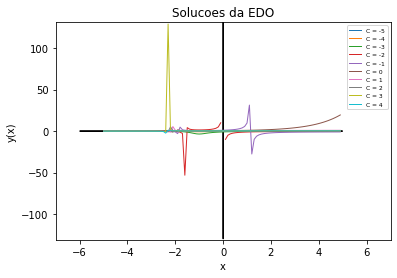

In [33]:
# PROGRAMA PRINCIPAL

mod = 4 # escolha de EDO
rad = 0 # escolha do tipo de intervalo, use 1 para radianos 

x = sp.symbols('x') #variavel independente em Latex
f = sp.Function('y')(x) #funcao em Latex

diffeq = edos(mod) #carrega EDO em Latex
display(diffeq) #imprime EDO

sol = dsolve(diffeq,f) #calcula solucao geral da EDO em Latex
display(sol) #imprime solucao geral

if rad == 1: #intervalo em radianos
    xmin = -np.pi; xmax = np.pi; dx = (xmax-xmin)/100
    x_plota = np.arange(xmin,xmax,dx)
else: #intervalo convencional
    xmin = -5; xmax = 5; dx = (xmax-xmin)/100
    x_plota = np.arange(xmin,xmax,dx)

for i in range(-5,5): #range de constantes para plotar mapa de solucoes
    C = i
    y_plota = plota(rad,mod,sol,C,xmin,x_plota) #plota solucao particular
    
    if i == -5:
        lim_y = np.nanmax(np.abs(y_plota)) #maximo inicial desconsiderando NAN
    elif np.nanmax(np.abs(y_plota)) > lim_y:
        lim_y = np.nanmax(np.abs(y_plota)) #atualiza o maximo se maior que o anterior

# CONFIGURACOES DO MAPAS DE SOLUCOES

plt.arrow( xmin -1, 0, xmax - xmin + 1, 0, length_includes_head = True, head_width = 0.1 ) #eixo x
plt.arrow( 0, (-1)*lim_y-1, 0, lim_y-((-1)*lim_y)+0.1*lim_y, length_includes_head = True, head_width = 0.1 ) #eixo y 
plt.xlim(xmin-2,xmax+2)
plt.ylim((-1)*lim_y-2,lim_y+2)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Solucoes da EDO")
plt.legend(fontsize=6)
plt.show()